In [33]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
!pip install catboost

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
df = pd.read_excel("Hepsi_Emlak.xlsx")
df.head(10)

,Şehir,İlçe,Fiyat,Metre_Kare,Konut Tipi,Oda + Salon Sayısı,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Kat Sayısı,Eşya Durumu,Banyo Sayısı,Kira Getirisi
0,Adana,Sarıçam,1.895.000 TL,175 m2,Daire,3 + 1,4. Kat,1 Yaşında,Kombi,13 Katlı,Eşyalı Değil,2.0,15.000 TL
1,Adana,Sarıçam,19.500.000 TL,628 m2,Villa,5 + 1,NaN,Sıfır Bina,Kombi,3 Katlı,Eşyalı Değil,3.0,1.000.000 TL
2,İstanbul,Beylikdüzü,3.150.000 TL,125 m2,Daire,2 + 1,2. Kat,3 Yaşında,Kombi,4 Katlı,Eşyalı Değil,1.0,30.000 TL
3,Ankara,Mamak,3.900.000 TL,260 m2,Daire,4 + 1,7. Kat,5 Yaşında,Kombi,7 Katlı,Eşyalı Değil,2.0,25.000 TL
4,Bursa,Osmangazi,3.750.000 TL,170 m2,Daire,4 + 1,2. Kat,5 Yaşında,Kombi,2 Katlı,Eşyalı Değil,1.0,NaN
5,Balıkesir,Edremit,3.650.000 TL,110 m2,Daire,2 + 1,2. Kat,15 Yaşında,Kat Kaloriferi,4 Katlı,Eşyalı Değil,1.0,25.000 TL
6,Balıkesir,Edremit,2.250.000 TL,100 m2,Daire,2 + 1,3. Kat,19 Yaşında,Klima,3 Katlı,Eşyalı Değil,1.0,12.000 TL
7,Balıkesir,Edremit,2.675.000 TL,100 m2,Daire,2 + 1,2. Kat,5 Yaşında,Kombi,4 Katlı,Eşyalı Değil,1.0,20.000 TL
8,Balıkesir,Edremit,3.790.000 TL,180 m2,Daire,4 + 1,3. Kat,13 Yaşında,Kombi,3 Katlı,Eşyalı Değil,2.0,NaN
9,Balıkesir,Edremit,3.990.000 TL,130 m2,Daire,2 + 1,2. Kat,4 Yaşında,Kombi,4 Katlı,Eşyalı Değil,1.0,25.000 TL


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Şehir               19085 non-null  object 
 1   İlçe                19085 non-null  object 
 2   Fiyat               19085 non-null  object 
 3   Metre_Kare          19085 non-null  object 
 4   Konut Tipi          19085 non-null  object 
 5   Oda + Salon Sayısı  19085 non-null  object 
 6   Bulunduğu Kat       16741 non-null  object 
 7   Bina Yaşı           19085 non-null  object 
 8   Isınma Tipi         19083 non-null  object 
 9   Kat Sayısı          19083 non-null  object 
 10  Eşya Durumu         17866 non-null  object 
 11  Banyo Sayısı        18869 non-null  float64
 12  Kira Getirisi       8113 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.9+ MB


In [10]:
df.shape

(19085, 13)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Banyo Sayısı,18869.0,1.633844,0.987714,1.0,1.0,1.0,2.0,30.0


## Data Pre-Processing

In [12]:
df.columns = [
    "City", "District", "Price(TL)", "Field(m²)", "Housing Type", 
    "Number of Rooms + Living Room", "Floor Location", "Building Age", 
    "Heating Type", "Number of Floors", "Property Status", 
    "Number of Bathrooms", "Rental Income(TL)"
]

df["Rental Income(TL)"] = df["Rental Income(TL)"].str.replace(" TL", "", regex=False)
df["Rental Income(TL)"] = df["Rental Income(TL)"].str.replace(".", "", regex=False)
df["Rental Income(TL)"] = df["Rental Income(TL)"].str.replace(",", "", regex=False)
df.loc[df["Rental Income(TL)"].str.contains("GBP", na=False), "Rental Income(TL)"] = (
    df["Rental Income(TL)"].str.replace(" GBP", "", regex=False).str.replace(".", "", regex=False).astype("Int64") * 44) #22 Oct
df["Rental Income(TL)"] = df["Rental Income(TL)"].astype("float64")


df["Rental Income(TL)"] = df["Rental Income(TL)"].fillna(df.groupby(['City', "District", "Field(m²)" , "Price(TL)"])['Rental Income(TL)'].transform("mean"))
df["Rental Income(TL)"] = df["Rental Income(TL)"].fillna(df.groupby(['City', "District", "Field(m²)"])['Rental Income(TL)'].transform("mean"))
df["Rental Income(TL)"] = df["Rental Income(TL)"].fillna(df.groupby(['City', "District"])['Rental Income(TL)'].transform("mean"))
df.dropna(how = "any" , inplace=True)
df["Price(TL)"] = df["Price(TL)"].str.replace(" TL", "")
df["Price(TL)"] = df["Price(TL)"].str.replace(".", "")
df.loc[df["Price(TL)"].str.contains("GBP"), "Price(TL)"] = (
    df["Price(TL)"].str.replace(" GBP", "").str.replace(".", "").astype("Int64") * 44) #22 Oct
df["Price(TL)"] = df["Price(TL)"].astype('int64')


df["Field(m²)"] = df["Field(m²)"].str.replace(" m2", "")
df["Field(m²)"] = df["Field(m²)"].replace("Kat Karşılığı :", "0")
df["Field(m²)"] = df["Field(m²)"].str.replace(".", "", regex=False)
df["Field(m²)"] = df["Field(m²)"].astype("int64")


df["Building Age"] = df["Building Age"].str.replace("Sıfır Bina", "0")
df["Building Age"] = df["Building Age"].str.replace(" Yaşında", "")
df["Building Age"] = df["Building Age"].astype("int64")


df["Number of Floors"] = df["Number of Floors"].str.replace(" Katlı", "", regex=False)
df["Number of Floors"] = df["Number of Floors"].astype('int64')


df[['Number of Rooms', 'Living_Rooms']] = df['Number of Rooms + Living Room'].str.split(r'\s*\+\s*', expand=True)
df.drop("Number of Rooms + Living Room", axis=1,inplace=True)
df['Number of Rooms'] = df['Number of Rooms'].astype("int64")
df['Living_Rooms'] = df['Living_Rooms'].astype("int64")
df = df.dropna(subset=['Number of Bathrooms'])
df["Number of Bathrooms"] = df["Number of Bathrooms"].astype('int64')


print(df.shape)

df = df.dropna(how="any")
df["Rental Income(TL)"] = df["Rental Income(TL)"].astype("int64")

(15387, 14)


## Data Visualization

In [13]:
df.head()

,City,District,Price(TL),Field(m²),Housing Type,Floor Location,Building Age,Heating Type,Number of Floors,Property Status,Number of Bathrooms,Rental Income(TL),Number of Rooms,Living_Rooms
0,Adana,Sarıçam,1895000,175,Daire,4. Kat,1,Kombi,13,Eşyalı Değil,2,15000,3,1
2,İstanbul,Beylikdüzü,3150000,125,Daire,2. Kat,3,Kombi,4,Eşyalı Değil,1,30000,2,1
3,Ankara,Mamak,3900000,260,Daire,7. Kat,5,Kombi,7,Eşyalı Değil,2,25000,4,1
4,Bursa,Osmangazi,3750000,170,Daire,2. Kat,5,Kombi,2,Eşyalı Değil,1,16438,4,1
5,Balıkesir,Edremit,3650000,110,Daire,2. Kat,15,Kat Kaloriferi,4,Eşyalı Değil,1,25000,2,1


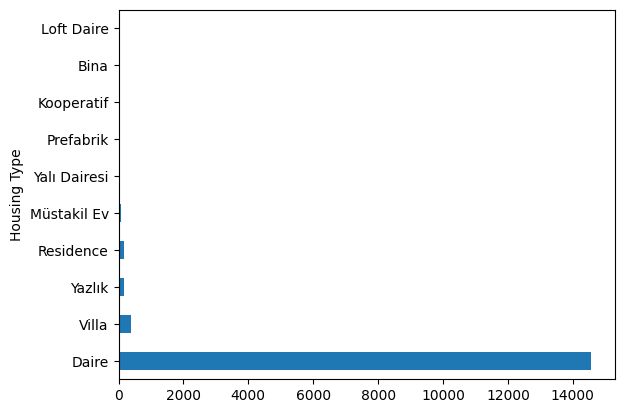

In [14]:
df["Housing Type"].value_counts().plot.barh();

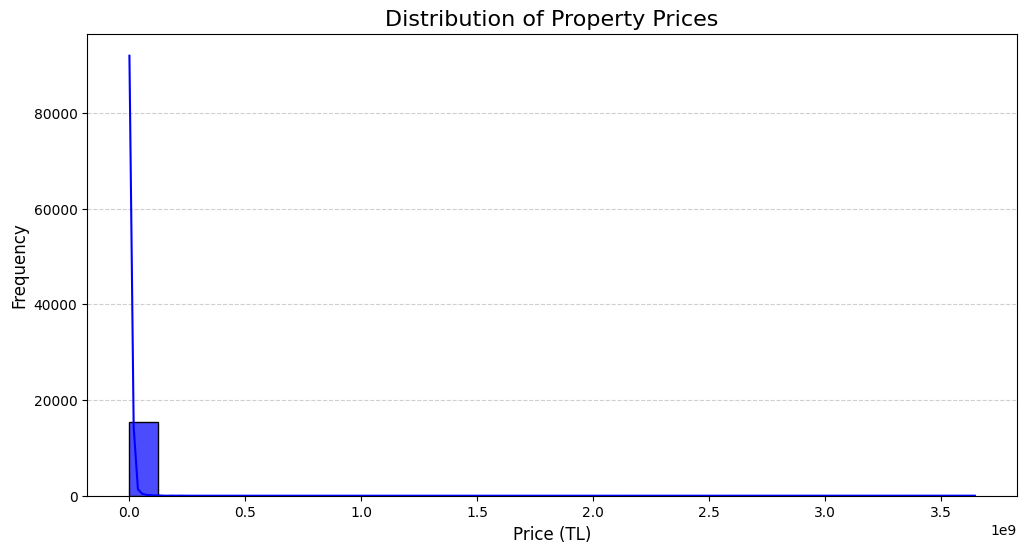

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price(TL)'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Property Prices', fontsize=16)
plt.xlabel('Price (TL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


C:\Users\METEHAN\AppData\Local\Temp\ipykernel_13968\2143488514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Price(TL)', data=avg_price_by_city, palette='viridis')


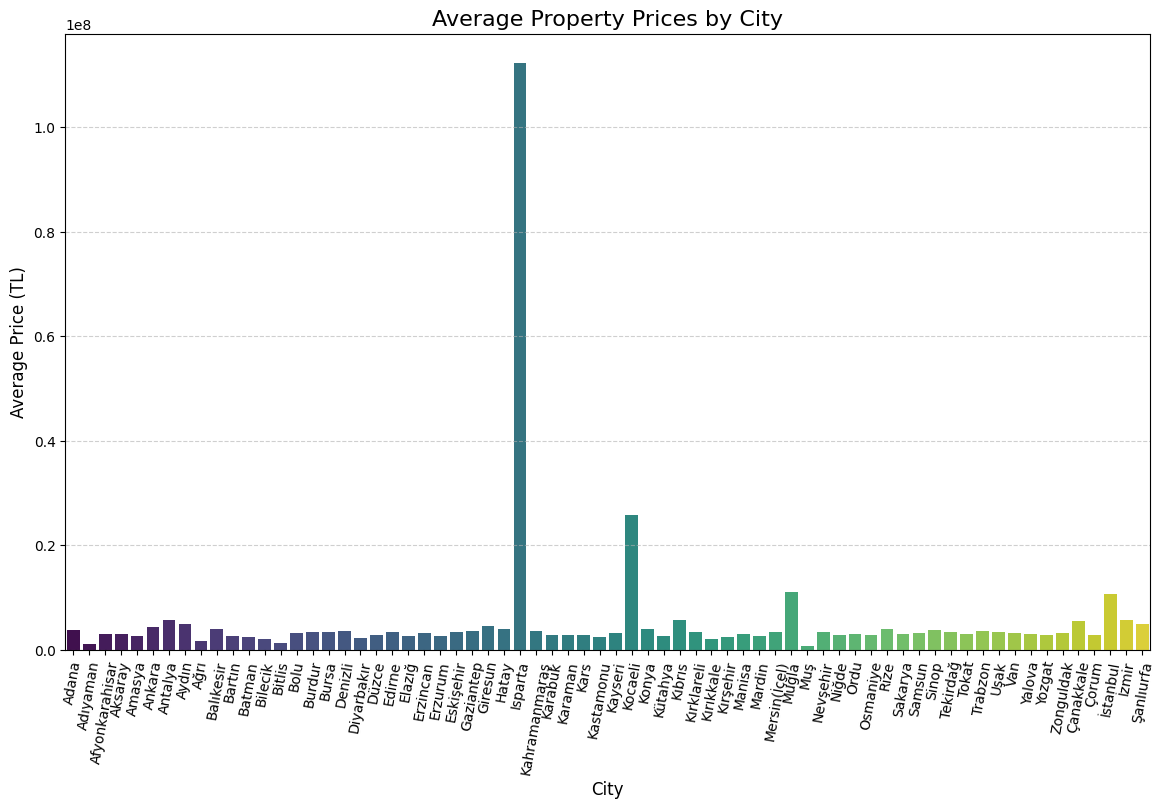

In [16]:
avg_price_by_city = df.groupby('City')['Price(TL)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Price(TL)', data=avg_price_by_city, palette='viridis')
plt.title('Average Property Prices by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price (TL)', fontsize=12)
plt.xticks(rotation=80, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

C:\Users\METEHAN\AppData\Local\Temp\ipykernel_13968\2224889990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Housing Type', data=df, order=df['Housing Type'].value_counts().index, palette='coolwarm')


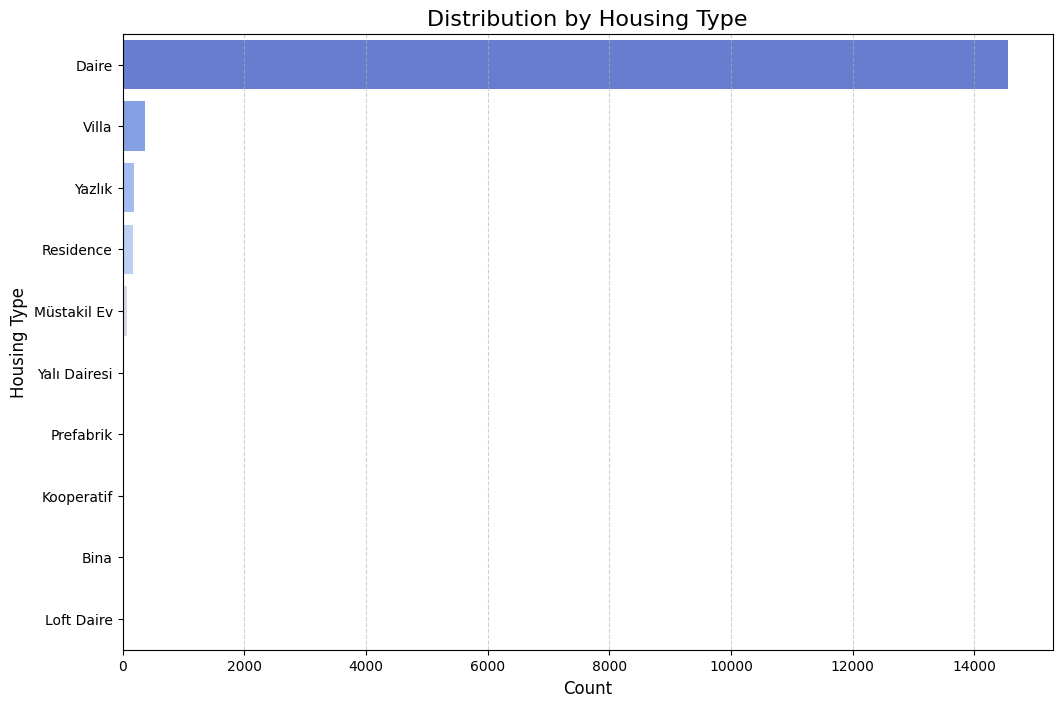

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Housing Type', data=df, order=df['Housing Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution by Housing Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Housing Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Encode Time

In [18]:
lbe = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
        df[col] = lbe.fit_transform(df[col])

In [19]:
df.head()

,City,District,Price(TL),Field(m²),Housing Type,Floor Location,Building Age,Heating Type,Number of Floors,Property Status,Number of Bathrooms,Rental Income(TL),Number of Rooms,Living_Rooms
0,0,213,1895000,175,1,15,1,9,13,1,2,15000,3,1
2,65,48,3150000,125,1,11,3,9,4,1,1,30000,2,1
3,5,166,3900000,260,1,18,5,9,7,1,2,25000,4,1
4,16,197,3750000,170,1,11,5,9,2,1,1,16438,4,1
5,9,78,3650000,110,1,11,15,7,4,1,1,25000,2,1


## Outlier Time

In [20]:
# Q1 ve Q3 hesaplama ve aykırı değerlerin filtrelenmesi
outlier_columns = ["Price(TL)", "Field(m²)", "Rental Income(TL)"]
for col in outlier_columns:    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"{col} için:")
    print(f"Q1 (1. Çeyrek): {Q1}")
    print(f"Q3 (3. Çeyrek): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Alt sınır: {lower_bound}")
    print(f"Üst sınır: {upper_bound}")
    print(f"Aykırı değer sayısı: {len(outliers)}\n")


Price(TL) için:
Q1 (1. Çeyrek): 2550000.0
Q3 (3. Çeyrek): 5800000.0
IQR: 3250000.0
Alt sınır: -2325000.0
Üst sınır: 10675000.0
Aykırı değer sayısı: 1576

Field(m²) için:
Q1 (1. Çeyrek): 95.0
Q3 (3. Çeyrek): 150.0
IQR: 55.0
Alt sınır: 12.5
Üst sınır: 232.5
Aykırı değer sayısı: 583

Rental Income(TL) için:
Q1 (1. Çeyrek): 15000.0
Q3 (3. Çeyrek): 25142.0
IQR: 10142.0
Alt sınır: -213.0
Üst sınır: 40355.0
Aykırı değer sayısı: 881



In [21]:
df.shape

(12347, 14)

## Machine Learning Time

#### Train-Test

In [22]:
X = df.drop("Price(TL)", axis=1)
y = df['Price(TL)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

print("Katsayılar:", model.coef_)
print("Sabit (Intercept):", model.intercept_)

Mean Squared Error (MSE): 1929210277603.574
R-squared (R²): 0.4287704706854043
Katsayılar: [ 6.52578016e+03 -5.07016447e+02  7.81091680e+03  2.08407130e+05
 -9.77566763e+03 -9.30472564e+03  4.48248951e+04  8.98541532e+03
 -1.15406022e+05  3.09208210e+05  1.15545772e+02  1.68868676e+05
  1.96769732e+05]
Sabit (Intercept): -1063748.1748092212


#### XGBRegressor

In [24]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train , y_train)

y_pred_xgb = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 1017011209614.6328
R-squared (R²): 0.6988680362701416


##### XGBRegressor With GridSearchCV

In [25]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

xgb_cv_model = GridSearchCV(model_xgb , param_grid= xgb_grid , cv=5 , n_jobs=-1 , verbose= 2)
xgb_cv_model.fit(X_train , y_train)
xgb_cv_model.best_params_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 1000}

In [26]:
xgb_cv_tuned = XGBRegressor(colsample_bytree= 0.5,
                            learning_rate= 0.1,
                            max_depth= 6,
                            n_estimators= 1000)

xgb_cv_tuned.fit(X_train , y_train)

y_pred_cv_xgb = xgb_cv_tuned.predict(X_test)

mse = mean_squared_error(y_test, y_pred_cv_xgb)
r2 = r2_score(y_test, y_pred_cv_xgb)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 908263188258.4067
R-squared (R²): 0.7310678362846375


#### LGBMRegressor

In [27]:
model_lgb = LGBMRegressor()
model_lgb.fit(X_train , y_train)
y_pred_lgb = model_lgb.predict(X_test)

# Modelin değerlendirilmesi
mse = mean_squared_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 9877, number of used features: 13
[LightGBM] [Info] Start training from score 3687961.013972
Mean Squared Error (MSE): 1099214913648.3073
R-squared (R²): 0.6745279532105354


##### LGBMRegressor With GridSearchCV

In [28]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm_cv_model = GridSearchCV(model_lgb, lgbm_grid, cv=5, n_jobs = -1, verbose = 2)

lgbm_cv_model.fit(X_train , y_train)
lgbm_cv_model.best_params_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 9877, number of used features: 13
[LightGBM] [Info] Start training from score 3687961.013972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 1000}

In [32]:
lgbm_tuned = LGBMRegressor(colsample_bytree =  0.5,
                            learning_rate = 0.1,
                            max_depth = 8,
                            n_estimators = 1000)

lgbm_tuned.fit(X_train , y_train)

y_pred_cv_lgbm = lgbm_tuned.predict(X_test)

mse = mean_squared_error(y_test, y_pred_cv_lgbm)
r2 = r2_score(y_test, y_pred_cv_lgbm)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 9877, number of used features: 13
[LightGBM] [Info] Start training from score 3687961.013972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

#### RandomForestRegressor

In [45]:
model_r = RandomForestRegressor()
model_r.fit(X_train , y_train)

y_pred_r = model_r.predict(X_test)

mse = mean_squared_error(y_test, y_pred_r)
r2 = r2_score(y_test, y_pred_r)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

print("Katsayılar:", model.coef_)
print("Sabit (Intercept):", model.intercept_)

Mean Squared Error (MSE): 1058416423648.9478
R-squared (R²): 0.6866081823642125
Katsayılar: [ 6.52578016e+03 -5.07016447e+02  7.81091680e+03  2.08407130e+05
 -9.77566763e+03 -9.30472564e+03  4.48248951e+04  8.98541532e+03
 -1.15406022e+05  3.09208210e+05  1.15545772e+02  1.68868676e+05
  1.96769732e+05]
Sabit (Intercept): -1063748.1748092212


# Done